### **Model Training**

In [14]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df= pd.read_csv('..\Data\data_final_dataset_for_training.csv')

In [4]:
df.shape

(12330, 12577)

In [5]:
df.head(5)

,num__AdClicks,num__InfoSectionCount,num__InfoSectionTime,num__HelpPageVisits,num__HelpPageTime,num__ItemBrowseCount,num__ItemBrowseTime,num__ExitRateFirstPage,num__SessionExitRatio,num__PageEngagementScore,...,cat__Market_TrafficSource_South America_15.0,cat__Market_TrafficSource_South America_2.0,cat__Market_TrafficSource_South America_20.0,cat__Market_TrafficSource_South America_3.0,cat__Market_TrafficSource_South America_4.0,cat__Market_TrafficSource_South America_5.0,cat__Market_TrafficSource_South America_6.0,cat__Market_TrafficSource_South America_8.0,cat__Market_TrafficSource_South America_9.0,MonetaryConversion
0,-1.455321,-0.707489,-0.449735,-0.399292,-0.241179,-0.692355,-0.622817,3.679990,3.259038,-0.322017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.464871,-0.707489,-0.449735,-0.399292,-0.241179,-0.669406,-0.588828,-0.460268,1.181495,-0.322017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.455321,-0.707489,-0.449735,-0.399292,-0.241179,-0.692355,-0.622817,3.679990,3.259038,-0.322017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.464871,-0.707489,-0.449735,-0.399292,-0.241179,-0.669406,-0.621400,0.574796,2.012512,-0.322017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.004775,-0.707489,-0.449735,-0.399292,-0.241179,-0.485814,-0.289569,-0.046243,0.142724,-0.322017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
TARGET = 'MonetaryConversion'
X = df.drop(columns=[TARGET])
y = df[TARGET]

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Target variable distribution:\n{y.value_counts()}")
print(f"Target variable percentage:\n{y.value_counts(normalize=True) * 100}")


Features (X) shape: (12330, 12576)
Target (y) shape: (12330,)
Target variable distribution:
MonetaryConversion
0    10422
1     1908
Name: count, dtype: int64
Target variable percentage:
MonetaryConversion
0    84.525547
1    15.474453
Name: proportion, dtype: float64


### **Splitting Data into Training and Testing Sets**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (9864, 12576)
X_test shape: (2466, 12576)
y_train shape: (9864,)
y_test shape: (2466,)


### **Verify stratification**

In [8]:
print("\nTarget distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)
print("\nTarget distribution in test set:")
print(y_test.value_counts(normalize=True) * 100)


Target distribution in training set:
MonetaryConversion
0    84.529603
1    15.470397
Name: proportion, dtype: float64

Target distribution in test set:
MonetaryConversion
0    84.509327
1    15.490673
Name: proportion, dtype: float64


### **Model Training**

### **Logistic Regression Classifier And Random Forest Classifier**

In [9]:
logistic_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000)

logistic_model.fit(X_train, y_train)
print("Logistic Regression Model trained successfully!")

print("\nTraining Random Forest Classifier Model...")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced', n_jobs=-1)

rf_model.fit(X_train, y_train)
print("Random Forest Classifier Model trained successfully!")

joblib.dump(logistic_model, '..\Models\logistic_regression_model.pkl')
print("Logistic Regression model saved to 'logistic_regression_model.pkl'.")

joblib.dump(rf_model,'..\Models\Random_forest_model.pkl')
print("Random forest model saved to 'Random_forest_model.pkl'.")


Logistic Regression Model trained successfully!

Training Random Forest Classifier Model...
Random Forest Classifier Model trained successfully!
Logistic Regression model saved to 'logistic_regression_model.pkl'.
Random forest model saved to 'Random_forest_model.pkl'.


### **Evaluating Model**


--- Logistic Regression Model Evaluation ---
Accuracy: 0.8654
Precision: 0.5579
Recall: 0.6309
F1-Score: 0.5921
ROC AUC Score: 0.8772

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2084
           1       0.56      0.63      0.59       382

    accuracy                           0.87      2466
   macro avg       0.74      0.77      0.76      2466
weighted avg       0.87      0.87      0.87      2466


Confusion Matrix for Logistic Regression:


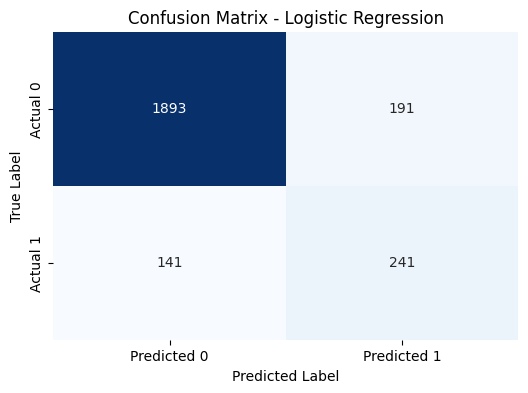

In [10]:
print("\n--- Logistic Regression Model Evaluation ---")
y_pred_lr = logistic_model.predict(X_test)
y_proba_lr = logistic_model.predict_proba(X_test)[:, 1] 

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_lr):.4f}")

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix for Logistic Regression:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- Random forest Model Evaluation ---
Accuracy: 0.8804
Precision: 0.8000
Recall: 0.3037
F1-Score: 0.4402
ROC AUC Score: 0.9001

Classification Report for Random forest:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2084
           1       0.80      0.30      0.44       382

    accuracy                           0.88      2466
   macro avg       0.84      0.64      0.69      2466
weighted avg       0.87      0.88      0.86      2466


Confusion Matrix for Random forest:


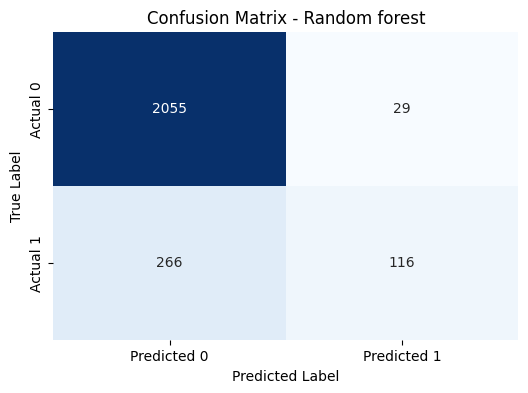

In [11]:
print("\n--- Random forest Model Evaluation ---")
y_pred_lr = rf_model.predict(X_test)
y_proba_lr = rf_model.predict_proba(X_test)[:, 1] 

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_lr):.4f}")

print("\nClassification Report for Random forest:")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix for Random forest:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **Hyperparameter Tuning with GridSearchCV**

In [ ]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}

--- Best Random Forest Classifier (Tuned) Performance ---
Accuracy: 0.8804
Precision: 0.8175
Recall: 0.2932
F1-Score: 0.4316
ROC AUC: 0.9018

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2084
           1       0.82      0.29      0.43       382

    accuracy                           0.88      2466
   macro avg       0.85      0.64      0.68      2466
weighted avg       0.87      0.88      0.86      2466


Confusion Matrix:


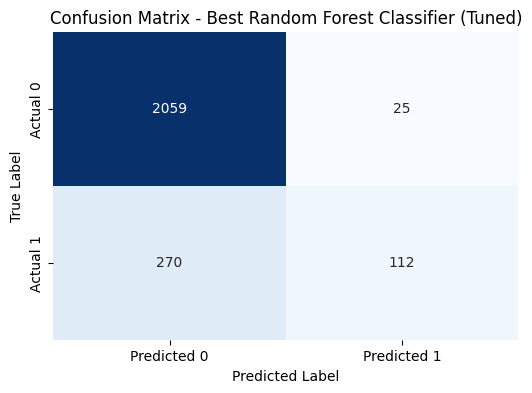

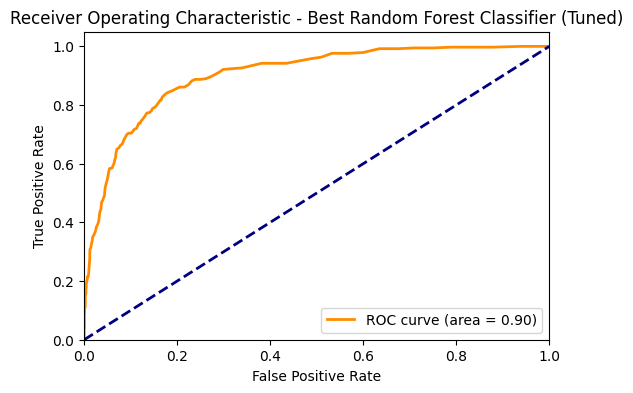

Best Random Forest Classifier model saved to 'best_random_forest_model.pkl'.

--- Model Training Complete ---
You can now load 'best_random_forest_model.pkl' (or other saved models) for prediction on new data.


In [15]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None], 
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=3,
    scoring='roc_auc', 
    verbose=1,
    n_jobs=-1 
)

grid_search_rf.fit(X_train, y_train)

print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
best_rf_clf = grid_search_rf.best_estimator_
evaluate_model(best_rf_clf, X_test, y_test, "Best Random Forest Classifier (Tuned)")
joblib.dump(best_rf_clf, '..\Models\Best_random_forest_model.pkl')
print("Best Random Forest Classifier model saved to 'best_random_forest_model.pkl'.")


print("\n--- Model Training Complete ---")
print("You can now load 'best_random_forest_model.pkl' (or other saved models) for prediction on new data.")

In [22]:
loaded_model = joblib.load('..\Models\Best_random_forest_model.pkl')
sample_new_data = X_test.iloc[0:8]
prediction = loaded_model.predict(sample_new_data)
prediction_proba = loaded_model.predict_proba(sample_new_data)
print(f"\nExample Prediction for a new sample: {prediction}")
print(f"Probability: {prediction_proba}")


Example Prediction for a new sample: [0 0 0 0 0 0 0 0]
Probability: [[0.97  0.03 ]
 [0.92  0.08 ]
 [0.515 0.485]
 [0.985 0.015]
 [0.965 0.035]
 [0.95  0.05 ]
 [0.915 0.085]
 [0.855 0.145]]
